## Import libraries and set visualization options

In [3]:
# Import libraries
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Set visualization options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

from itables import init_notebook_mode, show
init_notebook_mode(all_interactive=True)

<IPython.core.display.Javascript object>

## Create analysis folders

In [4]:
def create_analysis_folder(operating_system, project_name, analysis_name):
	
	# Set path to BSC folder for mac, linux and windows
	if operating_system == 'windows':
		pathToBSCfolder = 'Z:\\'
	elif operating_system == 'linux':
		pathToBSCfolder = os.path.join('/home','amontaner','BSC')
	elif operating_system == 'mac':
		pathToBSCfolder = os.path.join('/Users','annamontaner','Documents','BSC3')
	else:
		print ('undefined operating system') 
	
	# Path to project folder 
	project_folder = os.path.join('scratch','cli79','cli79334','projects', 'other', project_name)


   # Create analysis folder and subfolders 
	analysis_folder = os.path.join(pathToBSCfolder, project_folder, analysis_name)
	analysis_info_folder = os.path.join(analysis_folder,'analysis_info')
	intermediate_folder = os.path.join(analysis_folder,'intermediate_files')
	assets_folder = os.path.join(analysis_folder,'assets')
	final_folder = os.path.join(analysis_folder,'final_files')


	folder_list = [analysis_folder,
				   analysis_info_folder, 
				   assets_folder, 
				   intermediate_folder, 
				   final_folder]

	if not os.path.exists(analysis_folder):
		for items in folder_list:
			os.makedirs(items)
		print("Analysis folder and subfolders created '{}' created".format(analysis_name))
	else: 
		print("Already existing analysis '{}' ".format(analysis_name))

	return(analysis_folder)

In [5]:
# Create analysis folders
analysis_folder = create_analysis_folder('mac','1kGPhg38', '1kGPhg38_african_variants_all_annotations')	

Already existing analysis '1kGPhg38_african_variants_all_annotations' 


## Import data

### Import 1kGPhg38 data

In [6]:
data = pd.read_csv('/Users/annamontaner/Desktop/African_variants/subset_snvs_protein_coding_1kGPhg38.tsv', sep='\t')

/var/folders/kt/qf89bw917mg3nhrtrkj4_lmc0000gn/T/ipykernel_1167/1578672699.py:1: DtypeWarning: Columns (1,128,130,135) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/annamontaner/Desktop/African_variants/subset_snvs_protein_coding_1kGPhg38.tsv', sep='\t')


In [5]:
# Total number of annotations in 1kGPhg38
data.shape[0]

32577572

In [6]:
# Total unique variants in 1kGPhg38 
len(set(data['ID']))

29459588

#### Annotated effects in 1kGPhg38

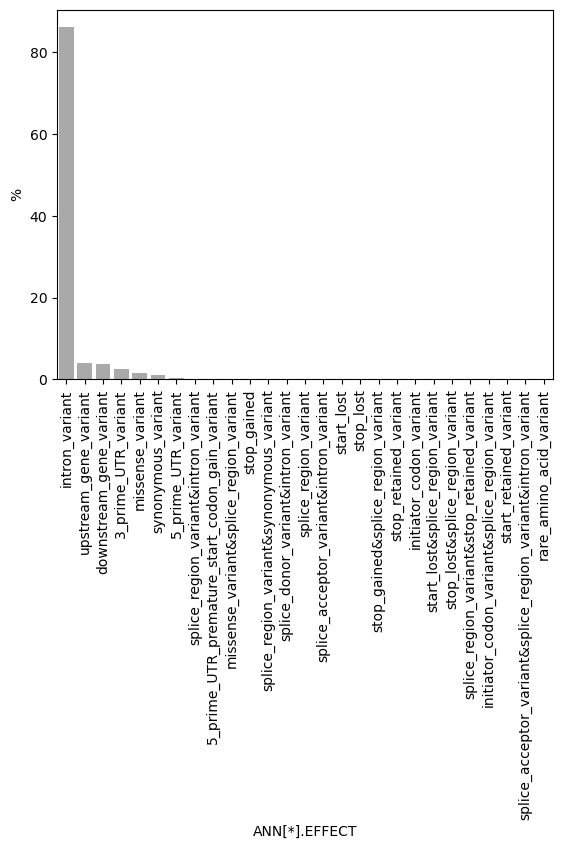

In [7]:
# Group by ANN[*].EFFECTS
group = data.groupby(['ANN[*].EFFECT']).size().reset_index(name='count')

# Calculate percentages
group['percentage'] = (group['count'] / group['count'].sum()) * 100

# Order 
group = group.sort_values('percentage',ascending=False)

# Export table
group.to_csv(os.path.join(analysis_folder,'assets','annotated_effects_1kGPhg38.tsv'), index=False)


sns.barplot(group, x="ANN[*].EFFECT", y='percentage', color = 'darkgray')
plt.xticks(rotation=90) 
plt.xlabel("ANN[*].EFFECT")
plt.ylabel("%")

plt.savefig(os.path.join(analysis_folder,'assets','annotated_effects_1kGPhg38.pdf'), dpi=300)
plt.show()

#### African AF distribution in 1kGPhg38

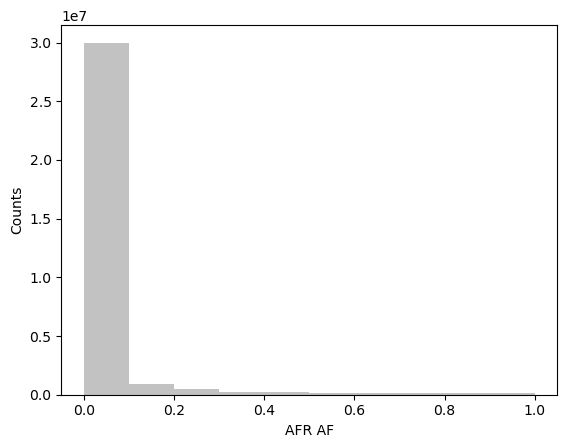

In [8]:
# Freq histogram full dataset for each value X 
plt.hist(data['AFR_AF'], bins=10, color='darkgray', alpha=0.7)

#plt.ylim(0,2000000)
plt.xlim(-0.05,1.05)

# Add labels and a title
plt.xlabel('AFR AF')
plt.ylabel('Counts')
#plt.title('1kGPhg38')

# Add a label to the plot
label_x = 0.72  # X-coordinate for the label
label_y = 1900000   # Y-coordinate for the label
label_text = "Total SNVs: " + str(data.shape[0])
#plt.text(label_x, label_y, label_text, fontsize=10, color='black')

# Display the histogram
plt.show()

### Import Fedorova data

In [ ]:
# Import Fedorova data full annotated data
#ARSAfedorova = pd.read_csv('/Users/annamontaner/Documents/BSC3/scratch/cli79/cli79334/projects/other/AFR_ARSA_FedorovaL/02_snpEff_annotation/results/20231129_203750_pipeline_bam_targetVariantCallingRed_Fedorova_test4/mutations_Fedorova_test4.tsv', sep="\t")
#len(set(ARSAfedorova['ID']))

In [8]:
# Import Fedorova data 'protein_coding' but not intersected with Gencode v3
ARSAfedorova_subset = pd.read_csv('/Users/annamontaner/Documents/BSC3/scratch/cli79/cli79334/projects/other/AFR_ARSA_FedorovaL/02_snpEff_annotation/results/20231129_203750_pipeline_bam_targetVariantCallingRed_Fedorova_test4/subset_snvs_protein_coding_Fedorova_test4.tsv', sep="\t")
len(set(ARSAfedorova_subset['ID']))

/var/folders/kt/qf89bw917mg3nhrtrkj4_lmc0000gn/T/ipykernel_1167/151955110.py:2: DtypeWarning: Columns (139) have mixed types. Specify dtype option on import or set low_memory=False.
  ARSAfedorova_subset = pd.read_csv('/Users/annamontaner/Documents/BSC3/scratch/cli79/cli79334/projects/other/AFR_ARSA_FedorovaL/02_snpEff_annotation/results/20231129_203750_pipeline_bam_targetVariantCallingRed_Fedorova_test4/subset_snvs_protein_coding_Fedorova_test4.tsv', sep="\t")


34480

In [6]:
# Length annotations
print(ARSAfedorova_subset.shape[0])
# Length unique annotations
print(len(set(ARSAfedorova_subset['ID'])))

36731

#### Add Fedorova label

In [9]:
# Add Fedorova label
data['fedorova_label'] = np.where(data['ID'].isin(ARSAfedorova_subset['ID']), 'AFR_ARSA_Fedorova', 'Not_AFR_ARSA_Fedorova')

#### Explore common variants between 1kGPhg38 and Fedorova

In [10]:
# Subset common variants
fedorova_common = data[data['ID'].isin(ARSAfedorova_subset['ID'])] 
len(set(fedorova_common['ID']))

31504

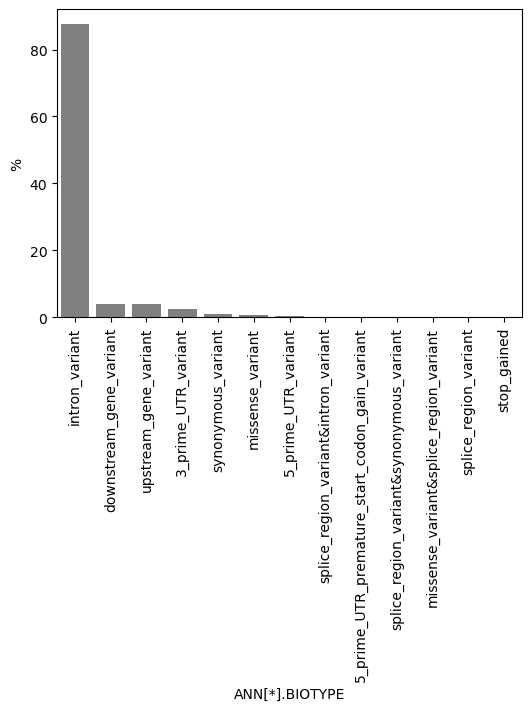

In [8]:
# Plot annotated effects of common variants
group =fedorova_common.groupby(['ANN[*].EFFECT']).size().reset_index(name='count')

# Calculate percentages
group['percentage'] = (group['count'] / group['count'].sum()) * 100

# Order 
group = group.sort_values('percentage',ascending=False)

# Export table
group.to_csv(os.path.join(analysis_folder,'assets','annotated_biotypes_pharmGKB.tsv'), index=False)


# Plot
plt.figure(figsize=(6, 4))

sns.barplot(group, x="ANN[*].EFFECT", y='percentage', color = 'grey')
plt.xticks(rotation=90) 
plt.xlabel("ANN[*].BIOTYPE")
plt.ylabel("%")

#plt.savefig(os.path.join(analysis_folder,'assets','annotated_biotypes_pharmGKB.pdf'), dpi=300)
plt.show()

### Import PharmGKB data

In [11]:
# Import pharmGKB ADME gene list
pharmGKB_ADME = pd.read_csv('/Users/annamontaner/Documents/BSC3/scratch/cli79/cli79334/projects/other/pharmGKB_ADME_genes/adme_gene_list.tsv',sep='\t')

In [10]:
# Unique gene annotations
len(set(pharmGKB_ADME['Gene Symbol']))

283

In [11]:
# Check how many of the genes in the pharmGKB list DO NOT overlap with the genes found within the 1kGPhg38 data
set(pharmGKB_ADME['Gene Symbol']) - set(data['ANN[*].GENE'])

{'ABCB7',
 'ABCC13',
 'CHST7',
 'CYP2D7',
 'DHRS4L1',
 'FMO6P',
 'GSTT1',
 'GSTT2',
 'LOC731356',
 'MAOA',
 'SLC22A18AS',
 'SULT1A3',
 'SULT1C1'}

#### Add ADME label

In [12]:
# Add ADME label
data['ADME_label'] = np.where(data['ANN[*].GENE'].isin(pharmGKB_ADME['Gene Symbol']), 'ADME', 'Not_ADME')

### Set abundance and specificity labels according to Fedorova's work

#### Subset African-abundant variants

In [10]:
# Subset African abundant
african_abundant1 = data[data['AFR_AF']>=0.18]

KeyboardInterrupt: 

In [20]:
# African abundant unique variants
len(set(african_abundant1['ID']))

1734675

In [21]:
# Percentage of unique variants within Africant abundants found in ADME genes
(len(set(african_abundant1[african_abundant1['ADME_label']=='ADME']['ID'])))/(len(set(african_abundant1['ID'])))*100

1.3855044893135602

Distribution of African AF in African abundant variants

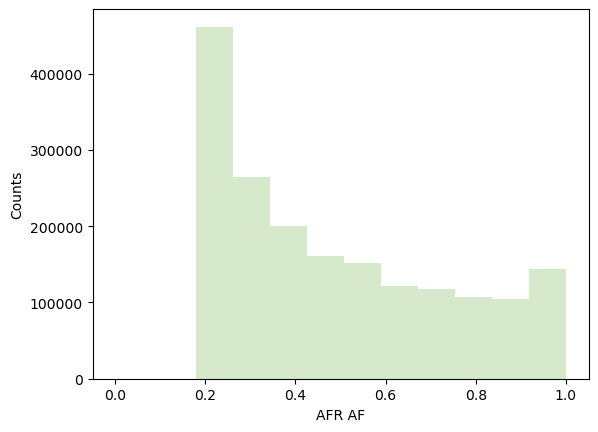

In [22]:
# Freq histogram full dataset for each value X 
plt.hist(african_abundant1['AFR_AF'], bins=10, color='#C5E0B4', alpha=0.7)

#plt.ylim(0,20000)
plt.xlim(-0.05,1.05)

# Add labels and a title
plt.xlabel('AFR AF')
plt.ylabel('Counts')
#plt.title('Abundant in the African superpopulation')

# Add a label to the plot
label_x = 0.72  # X-coordinate for the label
label_y = 28000   # Y-coordinate for the label
label_text = "Total SNVs: " + str(african_abundant1.shape[0])
#plt.text(label_x, label_y, label_text, fontsize=10, color='black')


# Display the histogram
plt.show()

MaxAF vs AFR_AF and ADME genes

/var/folders/kt/qf89bw917mg3nhrtrkj4_lmc0000gn/T/ipykernel_1581/1250034178.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  african_abundant1['maxFreqs'] = african_abundant1[alleleFreqs].max(axis=1)


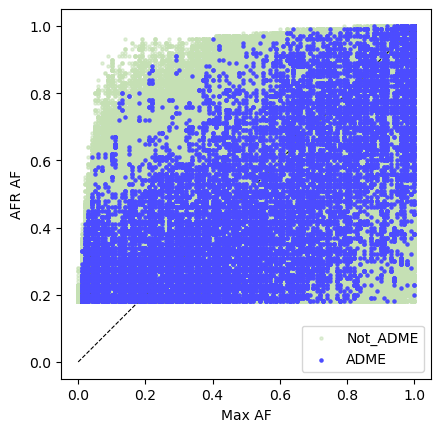

In [23]:
# MaxAF vs AFR_AF and ADME genes
alleleFreqs = ['EAS_AF','EUR_AF','AMR_AF','SAS_AF']
african_abundant1['maxFreqs'] = african_abundant1[alleleFreqs].max(axis=1)

groups = african_abundant1.groupby('ADME_label')

# Color mapping for each group
color_mapping = {'ADME': '#4C4CFF', 'not_ADME': '#C5E0B4'}

# Plot points for 'not_ADME' group first
for name, group in groups:
    if name != 'ADME':
        plt.scatter(
            group.maxFreqs,
            group.AFR_AF,
            label=name,
            marker='o',
            s=5,
            alpha=0.5,
            c=color_mapping.get(name, '#C5E0B4')
        )

# Plot points for 'ADME' group last with a higher zorder
adme_group = next(group for name, group in groups if name == 'ADME')
plt.scatter(
    adme_group.maxFreqs,
    adme_group.AFR_AF,
    label='ADME',
    marker='o',
    s=5,
    alpha=1,
    c=color_mapping.get('ADME', '#e3e3e6'),
    zorder=10
)

# Set the aspect ratio to be equal
plt.gca().set_aspect('equal')

# Set axis limits to go from 0 to 1
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)

# Add a diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='black', linewidth=0.8)

plt.legend()
plt.xlabel('Max AF')
plt.ylabel('AFR AF')
#plt.title('Abundant in the African superpopulation')
plt.show()

MaxAF vs AFR_AF and Fedorova variants

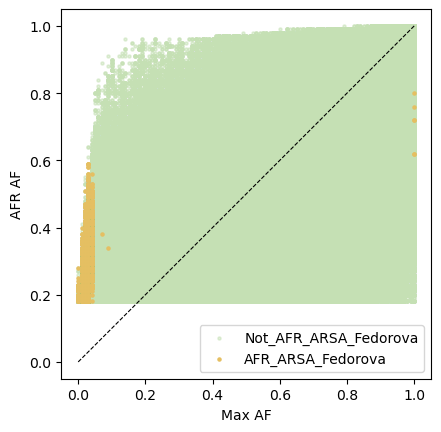

In [24]:
# MaxAF vs AFR_AF and Fedorova variants
groups = african_abundant1.groupby('fedorova_label')

# Color mapping for each group
color_mapping = {'AFR_ARSA_Fedorova': '#E5BF62', 'not_AFR_ARSA_Fedorova': '#C5E0B4'}

# Plot points for 'not_AFR_ARSA_Fedorova' group first
for name, group in groups:
    if name != 'AFR_ARSA_Fedorova':
        plt.scatter(
            group.maxFreqs,
            group.AFR_AF,
            label=name,
            marker='o',
            s=5,
            alpha=0.5,
            c=color_mapping.get(name, '#C5E0B4')
        )

# Plot points for 'AFR_ARSA_Fedorova' group last with a higher zorder
adme_group = next(group for name, group in groups if name == 'AFR_ARSA_Fedorova')
plt.scatter(
    adme_group.maxFreqs,
    adme_group.AFR_AF,
    label='AFR_ARSA_Fedorova',
    marker='o',
    s=5,
    alpha=1,
    c=color_mapping.get('AFR_ARSA_Fedorova', '#e3e3e6'),
    zorder=10
)

# Set the aspect ratio to be equal
plt.gca().set_aspect('equal')

# Set axis limits to go from 0 to 1
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)

# Add a diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='black', linewidth=0.8)

plt.legend()
plt.xlabel('Max AF')
plt.ylabel('AFR AF')
#plt.title('Abundant in African populations')
plt.show()

#### Subset African-specific variants

In [9]:
# Add overrepresentation label
african_abundant1['AFR_overrepresentation'] = african_abundant1['AFR_AF'].divide(african_abundant1['maxFreqs'])

# Replace nan values by 0 (Ex. AF_AFR = 0 and maxFreqs = 0)
african_abundant1['AFR_overrepresentation_mod'] = african_abundant1['AFR_overrepresentation'].replace({np.nan:0, np.inf:50})

# Convert to discrete number
AFR_overrepresentation_label0 = [round(x) for x in african_abundant1['AFR_overrepresentation_mod']]

NameError: name 'african_abundant1' is not defined

In [26]:
# Subset African-specific
african_specific1 = african_abundant1[african_abundant1['AFR_overrepresentation_mod'] >=5]

In [33]:
# Unique African-specific variants
len(set(african_specific1['ID']))

177364

In [44]:
# Percentage of African-specific variants in total dataset
len(set(african_specific1['ID'])) / len(set(data['ID'])) * 100

0.6020586574394726

In [45]:
# Percentage of African-specific variants in African-abundant dataset
len(set(african_specific1['ID'])) / len(set(african_abundant1['ID'])) * 100

10.224624209145805

Distribution of African AF in African-specific variants

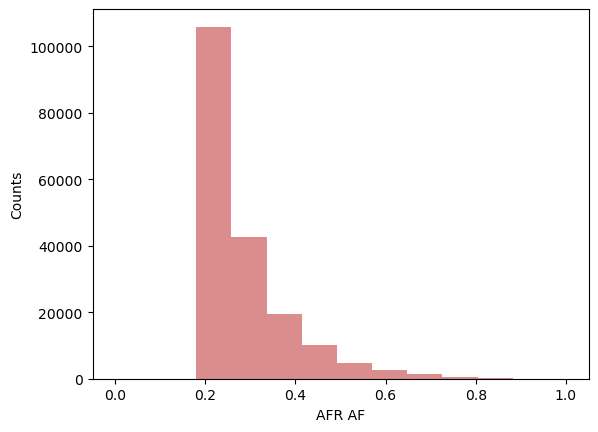

In [39]:
# Freq histogram full dataset for each value X 
plt.hist(african_specific1['AFR_AF'], bins=10, color='indianred', alpha=0.7)

#plt.ylim(0,20000)
plt.xlim(-0.05,1.05)

# Add labels and a title
plt.xlabel('AFR AF')
plt.ylabel('Counts')
#plt.title('Abundant in the African superpopulation')

# Add a label to the plot
label_x = 0.72  # X-coordinate for the label
label_y = 28000   # Y-coordinate for the label
label_text = "Total SNVs: " + str(african_specific1.shape[0])
#plt.text(label_x, label_y, label_text, fontsize=10, color='black')


# Display the histogram
plt.show()

Distribution of African overrepresentation in African-specific variants

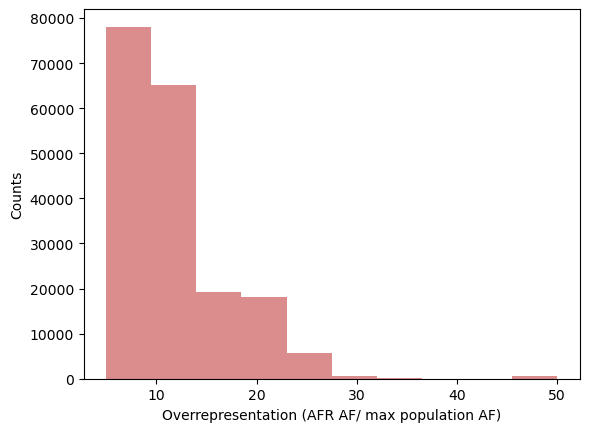

In [41]:
# Freq histogram full dataset for each value X 
plt.hist(african_specific1['AFR_overrepresentation_mod'], bins=10, color='indianred', alpha=0.7)

#plt.ylim(0,60000)
#plt.xlim(-0.05,1.05)

# Add labels and a title
plt.xlabel('Overrepresentation (AFR AF/ max population AF)')
plt.ylabel('Counts')
#plt.title('Specific to African populations')

# Add a label to the plot
label_x = 37  # X-coordinate for the label
label_y = 3100   # Y-coordinate for the label
#label_text = "Total SNVs: " + str(abundantAFR.shape[0])
#plt.text(label_x, label_y, label_text, fontsize=10, color='black')

# Display the histogram
plt.show()

MaxAF vs AFR_AF and ADME genes

/var/folders/kt/qf89bw917mg3nhrtrkj4_lmc0000gn/T/ipykernel_1581/4168016596.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  african_specific1['maxFreqs'] = african_specific1[alleleFreqs].max(axis=1)


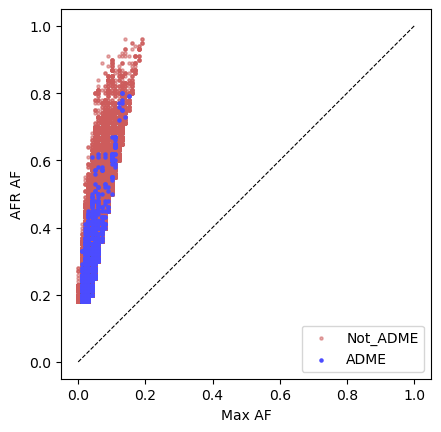

In [43]:
# MaxAF vs AFR_AF and ADME genes

alleleFreqs = ['EAS_AF','EUR_AF','AMR_AF','SAS_AF']
african_specific1['maxFreqs'] = african_specific1[alleleFreqs].max(axis=1)

groups = african_specific1.groupby('ADME_label')

# Color mapping for each group
color_mapping = {'ADME': '#4C4CFF', 'not_ADME': 'indianred'}

# Plot points for 'not_ADME' group first
for name, group in groups:
    if name != 'ADME':
        plt.scatter(
            group.maxFreqs,
            group.AFR_AF,
            label=name,
            marker='o',
            s=5,
            alpha=0.5,
            c=color_mapping.get(name, 'indianred')
        )

# Plot points for 'ADME' group last with a higher zorder
adme_group = next(group for name, group in groups if name == 'ADME')
plt.scatter(
    adme_group.maxFreqs,
    adme_group.AFR_AF,
    label='ADME',
    marker='o',
    s=5,
    alpha=1,
    c=color_mapping.get('ADME', '#e3e3e6'),
    zorder=10
)

# Set the aspect ratio to be equal
plt.gca().set_aspect('equal')

# Set axis limits to go from 0 to 1
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)

# Add a diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='black', linewidth=0.8)

plt.legend()
plt.xlabel('Max AF')
plt.ylabel('AFR AF')
#plt.title('Abundant in the African superpopulation')
plt.show()

In [46]:
# Total ADME genes
len(set(african_specific1[african_specific1['ADME_label'] == 'ADME']['ANN[*].GENE']))

186

In [48]:
# Total variants in ADME genes
len(set(african_specific1[african_specific1['ADME_label'] == 'ADME']['ID']))

2285

In [49]:
# Percentage of African-specific variants in ADME genes
len(set(african_specific1[african_specific1['ADME_label'] == 'ADME']['ID'])) / len(set(african_specific1['ID'])) * 100

1.288311043954805

MaxAF vs AFR_AF and Fedorova variants

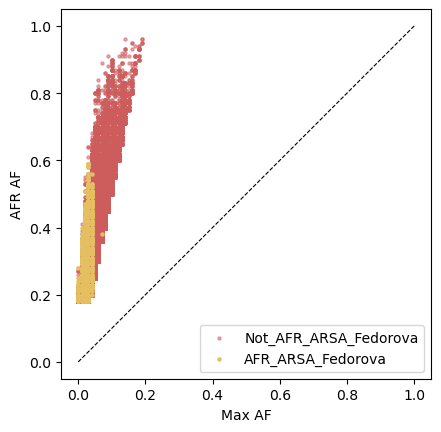

In [51]:
# MaxAF vs AFR_AF and Fedorova variants
groups = african_specific1.groupby('fedorova_label')

# Color mapping for each group
color_mapping = {'AFR_ARSA_Fedorova': '#E5BF62', 'not_AFR_ARSA_Fedorova': 'indianred'}

# Plot points for 'not_AFR_ARSA_Fedorova' group first
for name, group in groups:
    if name != 'AFR_ARSA_Fedorova':
        plt.scatter(
            group.maxFreqs,
            group.AFR_AF,
            label=name,
            marker='o',
            s=5,
            alpha=0.5,
            c=color_mapping.get(name, 'indianred')
        )

# Plot points for 'AFR_ARSA_Fedorova' group last with a higher zorder
adme_group = next(group for name, group in groups if name == 'AFR_ARSA_Fedorova')
plt.scatter(
    adme_group.maxFreqs,
    adme_group.AFR_AF,
    label='AFR_ARSA_Fedorova',
    marker='o',
    s=5,
    alpha=1,
    c=color_mapping.get('AFR_ARSA_Fedorova', '#e3e3e6'),
    zorder=10
)

# Set the aspect ratio to be equal
plt.gca().set_aspect('equal')

# Set axis limits to go from 0 to 1
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)

# Add a diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='black', linewidth=0.8)

plt.legend()
plt.xlabel('Max AF')
plt.ylabel('AFR AF')
#plt.title('Abundant in African populations')
plt.show()

Annotated effects in African-specific variants 

In [ ]:
# Annotated effects in African-specific variants

group =african_specific1.groupby(['ANN[*].EFFECT']).size().reset_index(name='count')

# Calculate percentages
group['percentage'] = (group['count'] / group['count'].sum()) * 100

# Order 
group = group.sort_values('percentage',ascending=False)

# Export table
#group.to_csv(os.path.join(analysis_folder,'assets','annotated_biotypes_pharmGKB.tsv'), index=False)


# Plot
plt.figure(figsize=(6, 4))

sns.barplot(group, x="ANN[*].EFFECT", y='percentage', color = 'rosybrown')
plt.xticks(rotation=90) 
plt.xlabel("ANN[*].BIOTYPE")
plt.ylabel("%")

#plt.savefig(os.path.join(analysis_folder,'assets','annotated_biotypes_pharmGKB.pdf'), dpi=300)
plt.show()

### Set abundance and specificity labels based on sliding thresholds

RECISION : Out of all the examples that were predicted as positive, how many are positive? --> Overlap with variants in Fedorova
  
RECALL : Out of all the positive examples, how many were predicted as positive? --> ADME genes

#### African-abundant variants

In [11]:
# Function to generate range with float numbers
import decimal

def float_range(start, stop, step):
  while start <= stop:
    yield float(start)
    start += decimal.Decimal(step)

print(list(float_range(0, 1, '0.05')))

[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]


In [ ]:
# Calculate precision and recall for a range of African AF 
fedorova_overlap = []
adme = []
unique_adme_genes = set(data[data['ADME_label'] == 'ADME']['ANN[*].GENE'])
unique_variants = []

window = float_range(0, 1, 0.05)

for i in window:
   data_subset = data[data['AFR_AF']>=i]
   fedorova_subset = data_subset[data_subset['fedorova_label']=='AFR_ARSA_Fedorova']
   fedorova_overlap.append(len(set(fedorova_subset['ID']))/len(set(data_subset['ID']))*100)
   adme_subset = data_subset[data_subset['ADME_label'] == 'ADME']
   adme.append((len(set(data_subset[data_subset['ADME_label']=='ADME']['ANN[*].GENE'])))/len(unique_adme_genes)*100)
   total_variants = len(set(data_subset['ID']))
   unique_variants.append(total_variants)
   print(fedorova_overlap)

In [15]:
# Generate dataframe
curves = pd.DataFrame({'AFR_AF':float_range(0, 1, 0.05),'Fedorova_overlap':fedorova_overlap,'ADME_genes':adme,'total_variants':unique_variants})

Plot curves

In [ ]:
# Plot
Fedorova_color = "khaki"
ADME_color = "#4C4CFF"

fig, ax1 = plt.subplots(figsize=(5, 5))
ax2 = ax1.twinx()

ax1.set_ylabel("Precision")
ax2.set_ylabel("Recall")
ax1.set_xlabel('African AF')

# Plotting the curves
ax2.plot(curves['AFR_AF'], curves['ADME_genes'], color=ADME_color, label='Recall')
ax1.plot(curves['AFR_AF'], curves['Fedorova_overlap'], color=Fedorova_color, label='Precision')



# Filling the area under the curves
ax2.fill_between(curves['AFR_AF'], 0, curves['ADME_genes'], color=ADME_color, alpha=0.2)
ax1.fill_between(curves['AFR_AF'], 0, curves['Fedorova_overlap'], color=Fedorova_color, alpha=0.4)



#ax1.tick_params(axis="y", labelcolor=Fedorova_color)
#ax2.tick_params(axis="y", labelcolor=ADME_color)

#lines = [precision_line, recall_line]
#labels = [line.get_label() for line in lines]
#ax1.legend(lines, labels, bbox_to_anchor=(1.5, 0.55))

plt.show()

Plot how many variants left in each step

In [ ]:
# Plot
num_variants_color = 'black'
fig, ax1 = plt.subplots(figsize=(5, 5))

ax1.set_ylabel("Total variants")
ax1.set_xlabel('African AF')

# Plotting the curves
ax1.plot(curves['AFR_AF'], curves['total_variants'], color=num_variants_color, label='Total number of variants')

# Filling the area under the curves
abundant_start = 0.2
abundant_end = 1
ax1.fill_between(curves['AFR_AF'], 0, curves['total_variants'], where=((curves['AFR_AF'] >= abundant_start) & (curves['AFR_AF'] <= abundant_end)), color='#C5E0B4', alpha=1)

plt.show()

Add African abundant label and subset

In [13]:
# Add label: African abundant / not abundant label
abundance_threshold = 0.20
data['abundantAFR_label'] = np.where(data['AFR_AF']>=abundance_threshold, 'abundant', 'not_abundant')

In [14]:
# Subset African abundant
afr_abundant = data[data['abundantAFR_label']=='abundant']

In [ ]:
# Total amount of African abundant unique IDs
print(len(set(afr_abundant['ID'])))

# Total amount of African abundant variants in ADME genes
print(len(set(afr_abundant[afr_abundant['ADME_label']=='ADME']['ID'])))

# Total amount ADME genes
print(len(set(afr_abundant[afr_abundant['ADME_label']=='ADME']['ANN[*].GENE'])))

# Percentage of African abundant unique IDs
print(len(set(afr_abundant['ID'])) / len(set(data['ID'])) * 100)

# Percentage of African abundant variants in ADME genes
print(len(set(afr_abundant[afr_abundant['ADME_label']=='ADME']['ID'])) / len(set(afr_abundant['ID'])) * 100)

In [20]:
# Export African abundant variants
afr_abundant.to_csv(analysis_folder + "/final_files/African_abundant.tsv", sep="\t", index=False)

#### African-specific variants (overrepresentation)

In [15]:
# Calculate maximum AF
alleleFreqs = ['EAS_AF','EUR_AF','AMR_AF','SAS_AF']
afr_abundant['maxFreqs'] = afr_abundant[alleleFreqs].max(axis=1)

# Calculate overrepresentation
afr_abundant['AFR_overrepresentation'] = afr_abundant['AFR_AF'].divide(afr_abundant['maxFreqs'])

# Replace nan values by 0 (Ex. AF_AFR = 0 and maxFreqs = 0)
afr_abundant['AFR_overrepresentation_mod'] = afr_abundant['AFR_overrepresentation'].replace({np.nan:0, np.inf:50})

# Convert float to integer number
AFR_overrepresentation_label0 = [round(x) for x in afr_abundant['AFR_overrepresentation_mod']]

# Add label
afr_abundant = afr_abundant.assign(AFR_overrepresentation_label = AFR_overrepresentation_label0)

/var/folders/kt/qf89bw917mg3nhrtrkj4_lmc0000gn/T/ipykernel_1167/1577400922.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afr_abundant['maxFreqs'] = afr_abundant[alleleFreqs].max(axis=1)
/var/folders/kt/qf89bw917mg3nhrtrkj4_lmc0000gn/T/ipykernel_1167/1577400922.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afr_abundant['AFR_overrepresentation'] = afr_abundant['AFR_AF'].divide(afr_abundant['maxFreqs'])
/var/folders/kt/qf89bw917mg3nhrtrkj4_lmc0000gn/T/ipykernel_1167/1577400922.py:9: SettingWithCopy

In [173]:
# Calculate precision and recall for a range of African overrepresentation 

fedorova_overlap = []
adme = []
unique_adme_genes = set(afr_abundant[afr_abundant['ADME_label'] == 'ADME']['ANN[*].GENE'])
unique_variants = []

window = float_range(1, max(afr_abundant['AFR_overrepresentation_mod']), 0.5)

for i in window:
   data_subset = afr_abundant[afr_abundant['AFR_overrepresentation_mod']>=i]
   fedorova_subset = data_subset[data_subset['fedorova_label']=='AFR_ARSA_Fedorova']
   fedorova_overlap.append(len(set(fedorova_subset['ID']))/len(set(data_subset['ID']))*100)
   adme_subset = data_subset[data_subset['ADME_label'] == 'ADME']
   adme.append((len(set(adme_subset['ANN[*].GENE'])))/len(unique_adme_genes)*100)
   total_variants = len(set(data_subset['ID']))
   unique_variants.append(total_variants)

In [175]:
# Generate dataframe
curves2 = pd.DataFrame({'AFR_overrepresentation_mod':float_range(1, max(afr_abundant['AFR_overrepresentation_mod']), 0.5),'Fedorova_overlap':fedorova_overlap,'ADME_genes':adme, 'total_variants':unique_variants})

Plot curves

In [ ]:
# Plot
Fedorova_color = "khaki"
ADME_color = "#4C4CFF"

fig, ax1 = plt.subplots(figsize=(5, 5))
ax2 = ax1.twinx()

ax1.set_ylabel("Precision")
ax2.set_ylabel("Recall")
ax1.set_xlabel('African overrepresentation')

ax1.plot(curves2['AFR_overrepresentation_mod'], curves2['Fedorova_overlap'], color=Fedorova_color)
ax2.plot(curves2['AFR_overrepresentation_mod'], curves2['ADME_genes'], color = ADME_color)

# Filling the area under the curves
ax2.fill_between(curves2['AFR_overrepresentation_mod'], 0, curves2['ADME_genes'], color=ADME_color, alpha=0.2)
ax1.fill_between(curves2['AFR_overrepresentation_mod'], 0, curves2['Fedorova_overlap'], color=Fedorova_color, alpha=0.4)

#ax1.tick_params(axis="y", labelcolor=Fedorova_color)
#ax2.tick_params(axis="y", labelcolor=ADME_color)

Plot how many variants left in each step

In [ ]:
# Plot
num_variants_color = 'black'
fig, ax1 = plt.subplots(figsize=(5, 5))

ax1.set_ylabel("Total variants")
ax1.set_xlabel('African overrepresentation')

# Plotting the curves
ax1.plot(curves2['AFR_overrepresentation_mod'], curves2['total_variants'], color=num_variants_color, label='Total number of variants')

# Filling the area under the curves
specific_start = 8
specific_end = 50
ax1.fill_between(curves2['AFR_overrepresentation_mod'], 0, curves2['total_variants'], where=((curves2['AFR_overrepresentation_mod'] >= specific_start) & (curves2['AFR_overrepresentation_mod'] <= specific_end)), color='indianred', alpha=1)

plt.show()

In [16]:
# Add label: African specific / not specific label
specific_threshold = 8
afr_abundant['specificAFR_label'] = np.where(afr_abundant['AFR_overrepresentation']>=specific_threshold, 'specific', 'not_specific')

In [13]:
# Export African abundant variants with ALL labels 
afr_abundant.to_csv(analysis_folder+"/final_files/African_abundant_all_labels.tsv", index=False, sep="\t")

In [17]:
# Subset African specific 
afr_specific = afr_abundant[afr_abundant['specificAFR_label'] == 'specific']

In [ ]:
# Total unique variants in the dataset
print(len(set(afr_specific['ID'])))

# Total unique variants in the dataset
print(len(set(afr_specific['ID'])) / len(set(data['ID'])) * 100)

# Total unique African specific variants in ADME genes
print(len(set(afr_specific[afr_specific['ADME_label']=='ADME']['ID'])))

# Percentage of African specific variants in ADME genes
print(len(set(afr_specific[afr_specific['ADME_label']=='ADME']['ID'])) / len(set(afr_specific['ID'])) * 100)

# Total unique African specific variants in ADME genes
print(len(set(afr_specific[afr_specific['ADME_label']=='ADME']['ANN[*].GENE'])))

In [16]:
# Export African specific variants
afr_specific.to_csv(analysis_folder+"/final_files/African_specific.tsv", index=False, sep="\t")

Plot African_specific from sliding thresholds: AF overrepresentation vs AFR AF, ADME label 

In [ ]:
# MaxAF vs AFR_AF and ADME genes

alleleFreqs = ['EAS_AF','EUR_AF','AMR_AF','SAS_AF']
afr_specific['maxFreqs'] = afr_specific[alleleFreqs].max(axis=1)

groups = afr_specific.groupby('ADME_label')

# Color mapping for each group
color_mapping = {'ADME': '#4C4CFF', 'not_ADME': 'indianred'}

# Plot points for 'not_ADME' group first
for name, group in groups:
    if name != 'ADME':
        plt.scatter(
            group.maxFreqs,
            group.AFR_AF,
            label=name,
            marker='o',
            s=5,
            alpha=0.5,
            c=color_mapping.get(name, 'indianred')
        )

# Plot points for 'ADME' group last with a higher zorder
adme_group = next(group for name, group in groups if name == 'ADME')
plt.scatter(
    adme_group.maxFreqs,
    adme_group.AFR_AF,
    label='ADME',
    marker='o',
    s=5,
    alpha=1,
    c=color_mapping.get('ADME', '#e3e3e6'),
    zorder=10
)

# Set the aspect ratio to be equal
plt.gca().set_aspect('equal')

# Set axis limits to go from 0 to 1
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)

# Add a diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='black', linewidth=0.8)

plt.legend()
plt.xlabel('Max AF')
plt.ylabel('African AF')
#plt.title('Abundant in the African superpopulation')
plt.show()

In [ ]:
# MaxAF vs AFR_AF and Fedorova variants
groups = afr_specific.groupby('fedorova_label')

# Color mapping for each group
color_mapping = {'AFR_ARSA_Fedorova': '#E5BF62', 'not_AFR_ARSA_Fedorova': 'indianred'}

# Plot points for 'not_AFR_ARSA_Fedorova' group first
for name, group in groups:
    if name != 'AFR_ARSA_Fedorova':
        plt.scatter(
            group.maxFreqs,
            group.AFR_AF,
            label=name,
            marker='o',
            s=5,
            alpha=0.5,
            c=color_mapping.get(name, 'indianred')
        )

# Plot points for 'AFR_ARSA_Fedorova' group last with a higher zorder
adme_group = next(group for name, group in groups if name == 'AFR_ARSA_Fedorova')
plt.scatter(
    adme_group.maxFreqs,
    adme_group.AFR_AF,
    label='AFR_ARSA_Fedorova',
    marker='o',
    s=5,
    alpha=1,
    c=color_mapping.get('AFR_ARSA_Fedorova', '#e3e3e6'),
    zorder=10
)

# Set the aspect ratio to be equal
plt.gca().set_aspect('equal')

# Set axis limits to go from 0 to 1
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)

# Add a diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='black', linewidth=0.8)

plt.legend()
plt.xlabel('Max AF')
plt.ylabel('AFR AF')
#plt.title('Abundant in African populations')
plt.show()

Plot annotated effects in African-specific variants

In [ ]:
# Annotated effects in African-specific variants

group =afr_specific.groupby(['ANN[*].EFFECT']).size().reset_index(name='count')

# Calculate percentages
group['percentage'] = (group['count'] / group['count'].sum()) * 100

# Order 
group = group.sort_values('percentage',ascending=False)

# Export table
#group.to_csv(os.path.join(analysis_folder,'assets','annotated_biotypes_pharmGKB.tsv'), index=False)


# Plot
plt.figure(figsize=(6, 4))

sns.barplot(group, x="ANN[*].EFFECT", y='percentage', color = 'indianred')
plt.xticks(rotation=90) 
plt.xlabel("ANN[*].BIOTYPE")
plt.ylabel("%")

#plt.savefig(os.path.join(analysis_folder,'assets','annotated_biotypes_pharmGKB.pdf'), dpi=300)
plt.show()

Explore ADME genes in African-specific variants

In [18]:
afr_specific

SAMPLE CHROM        POS REF ALT ANN[*].GENE    ANN[*].GENEID  \
19         chr1     1      67181   A   G       OR4F5  ENSG00000186092   
255        chr1     1     927303   G   A      SAMD11  ENSG00000187634   
489        chr1     1     931526   G   A      SAMD11  ENSG00000187634   
506        chr1     1     931990   T   C      SAMD11  ENSG00000187634   
511        chr1     1     932038   C   T      SAMD11  ENSG00000187634   
...         ...   ...        ...  ..  ..         ...              ...   
32575030   chrX     X    2767152   G   A          XG  ENSG00000124343   
32575275   chrX     X    2775070   T   C          XG  ENSG00000124343   
32575276   chrX     X    2775075   C   A          XG  ENSG00000124343   
32577327   chrX     X  156001085   T   C        IL9R  ENSG00000124334   
32577387   chrX     X  156002438   A   G        IL9R  ENSG00000124334   

         ANN[*].FEATURE    ANN[*].FEATUREID  ANN[*].BIOTYPE   ANN[*].EFFECT  \
19           transcript   ENST00000641515.2  protein_coding  intron_variant   
255          transcript   ENST00000616016.5  protein_coding  intron_variant   
489          transcript   ENST00000616016.5  protein_coding  intron_variant   
506          transcript   ENST00000616016.5  protein_coding  intron_variant   
511          transcript   ENST00000616016.5  protein_coding  intron_variant   
...                 ...                 ...             ...             ...   
32575030     transcript   ENST00000644266.2  protein_coding  intron_variant   
32575275     transcript   ENST00000644266.2  protein_coding  intron_variant   
32575276     transcript   ENST00000644266.2  protein_coding  intron_variant   
32577327     transcript  ENST00000244174.11  protein_coding  intron_variant   
32577387     transcript  ENST00000244174.11  protein_coding  intron_variant   

         ANN[*].IMPACT  ANN[*].RANK  ANN[*].HGVS_C ANN[*].HGVS_P  \
19            MODIFIER            2    c.9+1608A>G             .   
255           MODIFIER            2  c.609+1290G>A             .   
489           MODIFIER            4   c.842+437G>A             .   
506           MODIFIER            4   c.842+901T>C             .   
511           MODIFIER            4   c.842+949C>T             .   
...                ...          ...            ...           ...   
32575030      MODIFIER            1   c.62-3398G>A             .   
32575275      MODIFIER            3   c.127+331T>C             .   
32575276      MODIFIER            3   c.127+336C>A             .   
32577327      MODIFIER            1   c.29-1821T>C             .   
32577387      MODIFIER            1    c.29-468A>G             .   

          ANN[*].CDNA_POS  ANN[*].CDNA_LEN  ANN[*].CDS_POS  ANN[*].CDS_LEN  \
19                     -1               -1              -1              -1   
255                    -1               -1              -1              -1   
489                    -1               -1              -1              -1   
506                    -1               -1              -1              -1   
511                    -1               -1              -1              -1   
...                   ...              ...             ...             ...   
32575030               -1               -1              -1              -1   
32575275               -1               -1              -1              -1   
32575276               -1               -1              -1              -1   
32577327               -1               -1              -1              -1   
32577387               -1               -1              -1              -1   

          ANN[*].AA_POS  ANN[*].AA_LEN  ANN[*].DISTANCE ANN[*].ALLELE  \
19                   -1             -1                0             G   
255                  -1             -1                0             A   
489                  -1             -1                0             A   
506                  -1             -1                0             C   
511                  -1             -1                0         

In [20]:
# Subset pharmGKB genes overlapping with African specific variants
pharmGKB_ADME_afr_specific = pharmGKB_ADME[pharmGKB_ADME['Gene Symbol'].isin((afr_specific['ANN[*].GENE'].to_list()))]

In [27]:
# Check overlap is correct
print(len(set(afr_specific[afr_specific['ADME_label']=='ADME']['ANN[*].GENE'])) - len(set(pharmGKB_ADME_afr_specific['Gene Symbol'])))

# Check total overlapping genes
print(len(set(pharmGKB_ADME_afr_specific['Gene Symbol'])))

0
140


In [30]:
pharmGKB_ADME_afr_specific['Gene Symbol'].to_csv(analysis_folder+"/final_files/African_specific_ADME_genes.tsv", index=False, sep="\t")